<a href="https://colab.research.google.com/github/Viage-Edu/ENSYS5800-AI-Energy-Classroom/blob/main/07.%20Fundamentals%20-%20Artificial%20Neural%20Networks/07.a%20Classification%20-%20Descriptive%20Analytics%20-%20Building%20Energy%20Data%20(Example%202.2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ENSYS 5800: Applications of Artificial Intelligence in Energy Systems

# 02a. Fundamentals - Descriptive Analytics

## Data Understanding

### Example 2.2: Building Energy Benchmarking Data

#### Investigating the raw data and setup dataframe

* Reference: [Industrial Asessment Center Data](https://iac.university/download)

![Example2.2_data_import_inspection.png](attachment:5b32ead2-a539-4a91-b82b-76b59467a7da.png)

In [ ]:
import pandas as pd                             # Import the pandas library as the object named 'pd'
import matplotlib.pyplot as plt                 # Import the matplotlib plotting package
import seaborn as sns; sns.set()                # Import the seaborn plotting package

url="https://storage.googleapis.com/doe-iac/IAC_Database_20210127.csv"    # Assign the data source URL as a variable called 'url'
data=pd.read_csv(url, sep=',', header=None, error_bad_lines=False)        # Create pandas dataframe, pd, by reading the url data as a csv formatted data file

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


*View the properties of the raw data variable (which is a 'dataframe')*

In [ ]:
data                                            # View the raw dataframe. Note that the column names are actually in the first row

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,ID,CENTER,FY,SIC,NAICS,STATE,SALES,EMPLOYEES,PLANT_AREA,PRODUCTS,PRODUNITS,PRODLEVEL,PRODHOURS,NUMARS,EC_plant_cost,EC_plant_usage,ED_plant_cost,ED_plant_usage,EF_plant_cost,E2_plant_cost,E2_plant_usage,E3_plant_cost,E3_plant_usage,E4_plant_cost,E4_plant_usage,E5_plant_cost,E5_plant_usage,E6_plant_cost,E6_plant_usage,E7_plant_cost,E7_plant_usage,E8_plant_cost,E8_plant_usage,E9_plant_cost,E9_plant_usage,E10_plant_cost,E10_plant_usage,E11_plant_cost,E11_plant_usage,E12_plant_cost,E12_plant_usage,W0_plant_cost,W0_plant_usage,W1_plant_cost,W1_plant_usage,W2_plant_cost,W2_plant_usage,W3_plant_cost,W3_plant_usage,W4_plant_cost,W4_plant_usage,W5_plant_cost,W5_plant_usage,W6_plant_cost,W6_plant_usage
1,AM0001,AM,1987,3671,NaN,TX,33900000,206,NaN,MICRO & MINI COMPUTERS,1,310,2250,7,184985,2560082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AM0002,AM,1987,2761,NaN,TX,25000000,156,NaN,BUSINESS FORMS,NaN,NaN,2250,9,267702,4867233,NaN,NaN,NaN,70657,19338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AM0003,AM,1987,3494,NaN,TX,15000000,200,NaN,SAFETY JOINTS & VALVES,NaN,NaN,2250,8,129334,1723036,NaN,NaN,NaN,10146,2074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AM0004,AM,1987,3713,NaN,TX,4200000,75,NaN,TRUCKS BEDS & TRAILERS,1,1000,2340,11,53511,483880,NaN,NaN,NaN,15475,3865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19397,WV0599,WV,2020,2812,325180,WV,9.12e+07,232,865000,Chlorinated Dry Bleach,2,5.17e+07,8400,14,1.28201e+06,3.8688e+07,940893,62717,114518,611704,206312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.31439e+06,194544,181045,194544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19398,WV0600,WV,2020,4581,488119,WV,2.9e+06,11,64121,Domestic Airport,NaN,5000,8760,6,34170,747835,30090,1788,1560,34489,4818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19399,WV0601,WV,2020,2085,312140,WV,1e+07,28,6766,Distilled Spirits,5,159,8400,10,29162,746827,36410,2107,2014,71556,10194,1330,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91800,540000,NaN,NaN,24550,54000,NaN,NaN,15085,2.01135e+06
19400,WV0602,WV,2020,2099,311999,PA,6e+07,66,83500,Release Agents and Icing Stabilizers,2,6e+07,4680,10,55011,1.58688e+06,76286,6954,1585,137263,20705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
headers = data.iloc[0]                                           # Create a temporary variable which is the first row (which has the column names)
data  = pd.DataFrame(data.values[1:], columns=headers)           # Recreate the dataframe and assign the headers variable as the column names (drop the first row)
data

,ID,CENTER,FY,SIC,NAICS,STATE,SALES,EMPLOYEES,PLANT_AREA,PRODUCTS,PRODUNITS,PRODLEVEL,PRODHOURS,NUMARS,EC_plant_cost,EC_plant_usage,ED_plant_cost,ED_plant_usage,EF_plant_cost,E2_plant_cost,E2_plant_usage,E3_plant_cost,E3_plant_usage,E4_plant_cost,E4_plant_usage,E5_plant_cost,E5_plant_usage,E6_plant_cost,E6_plant_usage,E7_plant_cost,E7_plant_usage,E8_plant_cost,E8_plant_usage,E9_plant_cost,E9_plant_usage,E10_plant_cost,E10_plant_usage,E11_plant_cost,E11_plant_usage,E12_plant_cost,E12_plant_usage,W0_plant_cost,W0_plant_usage,W1_plant_cost,W1_plant_usage,W2_plant_cost,W2_plant_usage,W3_plant_cost,W3_plant_usage,W4_plant_cost,W4_plant_usage,W5_plant_cost,W5_plant_usage,W6_plant_cost,W6_plant_usage
0,AM0001,AM,1987,3671,NaN,TX,33900000,206,NaN,MICRO & MINI COMPUTERS,1,310,2250,7,184985,2560082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AM0002,AM,1987,2761,NaN,TX,25000000,156,NaN,BUSINESS FORMS,NaN,NaN,2250,9,267702,4867233,NaN,NaN,NaN,70657,19338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AM0003,AM,1987,3494,NaN,TX,15000000,200,NaN,SAFETY JOINTS & VALVES,NaN,NaN,2250,8,129334,1723036,NaN,NaN,NaN,10146,2074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AM0004,AM,1987,3713,NaN,TX,4200000,75,NaN,TRUCKS BEDS & TRAILERS,1,1000,2340,11,53511,483880,NaN,NaN,NaN,15475,3865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AM0005,AM,1987,2024,NaN,TX,12000000,39,NaN,ICE CREAM,5,2000,2080,7,174617,2868113,NaN,NaN,NaN,10448,2903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19396,WV0599,WV,2020,2812,325180,WV,9.12e+07,232,865000,Chlorinated Dry Bleach,2,5.17e+07,8400,14,1.28201e+06,3.8688e+07,940893,62717,114518,611704,206312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.31439e+06,194544,181045,194544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19397,WV0600,WV,2020,4581,488119,WV,2.9e+06,11,64121,Domestic Airport,NaN,5000,8760,6,34170,747835,30090,1788,1560,34489,4818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19398,WV0601,WV,2020,2085,312140,WV,1e+07,28,6766,Distilled Spirits,5,159,8400,10,29162,746827,36410,2107,2014,71556,10194,1330,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91800,540000,NaN,NaN,24550,54000,NaN,NaN,15085,2.01135e+06
19399,WV0602,WV,2020,2099,311999,PA,6e+07,66,83500,Release Agents and Icing Stabilizers,2,6e+07,4680,10,55011,1.58688e+06,76286,6954,1585,137263,20705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data = data.set_index(['ID'])              # Set the 'ID' column as the index (i.e. key) in the pandas dataframe. (Note that each ID is unique)
data                                       # Note that the row names are now the IDs

,CENTER,FY,SIC,NAICS,STATE,SALES,EMPLOYEES,PLANT_AREA,PRODUCTS,PRODUNITS,PRODLEVEL,PRODHOURS,NUMARS,EC_plant_cost,EC_plant_usage,ED_plant_cost,ED_plant_usage,EF_plant_cost,E2_plant_cost,E2_plant_usage,E3_plant_cost,E3_plant_usage,E4_plant_cost,E4_plant_usage,E5_plant_cost,E5_plant_usage,E6_plant_cost,E6_plant_usage,E7_plant_cost,E7_plant_usage,E8_plant_cost,E8_plant_usage,E9_plant_cost,E9_plant_usage,E10_plant_cost,E10_plant_usage,E11_plant_cost,E11_plant_usage,E12_plant_cost,E12_plant_usage,W0_plant_cost,W0_plant_usage,W1_plant_cost,W1_plant_usage,W2_plant_cost,W2_plant_usage,W3_plant_cost,W3_plant_usage,W4_plant_cost,W4_plant_usage,W5_plant_cost,W5_plant_usage,W6_plant_cost,W6_plant_usage
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AM0001,AM,1987,3671,NaN,TX,33900000,206,NaN,MICRO & MINI COMPUTERS,1,310,2250,7,184985,2560082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AM0002,AM,1987,2761,NaN,TX,25000000,156,NaN,BUSINESS FORMS,NaN,NaN,2250,9,267702,4867233,NaN,NaN,NaN,70657,19338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AM0003,AM,1987,3494,NaN,TX,15000000,200,NaN,SAFETY JOINTS & VALVES,NaN,NaN,2250,8,129334,1723036,NaN,NaN,NaN,10146,2074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AM0004,AM,1987,3713,NaN,TX,4200000,75,NaN,TRUCKS BEDS & TRAILERS,1,1000,2340,11,53511,483880,NaN,NaN,NaN,15475,3865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AM0005,AM,1987,2024,NaN,TX,12000000,39,NaN,ICE CREAM,5,2000,2080,7,174617,2868113,NaN,NaN,NaN,10448,2903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WV0599,WV,2020,2812,325180,WV,9.12e+07,232,865000,Chlorinated Dry Bleach,2,5.17e+07,8400,14,1.28201e+06,3.8688e+07,940893,62717,114518,611704,206312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.31439e+06,194544,181045,194544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WV0600,WV,2020,4581,488119,WV,2.9e+06,11,64121,Domestic Airport,NaN,5000,8760,6,34170,747835,30090,1788,1560,34489,4818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WV0601,WV,2020,2085,312140,WV,1e+07,28,6766,Distilled Spirits,5,159,8400,10,29162,746827,36410,2107,2014,71556,10194,1330,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91800,540000,NaN,NaN,24550,54000,NaN,NaN,15085,2.01135e+06


#### Data preparation

![Example2.2_data_preparation.png](attachment:b82aed42-0992-4bcb-856d-98c8938a61f6.png)

In [ ]:
data.dtypes                                                      # Note that all of the columns (aka variables) are objects. We need numeric and strings for analytics.

0
CENTER             object
FY                 object
SIC                object
NAICS              object
STATE              object
SALES              object
EMPLOYEES          object
PLANT_AREA         object
PRODUCTS           object
PRODUNITS          object
PRODLEVEL          object
PRODHOURS          object
NUMARS             object
EC_plant_cost      object
EC_plant_usage     object
ED_plant_cost      object
ED_plant_usage     object
EF_plant_cost      object
E2_plant_cost      object
E2_plant_usage     object
E3_plant_cost      object
E3_plant_usage     object
E4_plant_cost      object
E4_plant_usage     object
E5_plant_cost      object
E5_plant_usage     object
E6_plant_cost      object
E6_plant_usage     object
E7_plant_cost      object
E7_plant_usage     object
E8_plant_cost      object
E8_plant_usage     object
E9_plant_cost      object
E9_plant_usage     object
E10_plant_cost     object
E10_plant_usage    object
E11_plant_cost     object
E11_plant_usage    object
E12_plant_

In [ ]:
data['EC_plant_usage']=data['EC_plant_usage'].astype('float64')    # Convert this column to floating point number
data['EC_plant_usage'].describe()                                  # Now we can calculate basic statistics

count    1.935800e+04
mean     8.411984e+06
std      2.740235e+07
min      3.600000e+01
25%      1.402611e+06
50%      3.291729e+06
75%      8.023242e+06
max      1.220174e+09
Name: EC_plant_usage, dtype: float64

In [ ]:
data['PLANT_AREA']=data['PLANT_AREA'].astype('float64')    # Convert this column to floating point number
data['PLANT_AREA'].describe()                              # Now we can calculate basic statistics

count    1.530800e+04
mean     4.856624e+05
std      1.336025e+07
min      1.000000e+00
25%      6.000000e+04
50%      1.100000e+05
75%      2.030000e+05
max      1.450000e+09
Name: PLANT_AREA, dtype: float64

In [ ]:
data['EC_plant_usage'].describe()                                     # Calculate Univariate statistics EC Plant Usage

count    1.935800e+04
mean     8.411984e+06
std      2.740235e+07
min      3.600000e+01
25%      1.402611e+06
50%      3.291729e+06
75%      8.023242e+06
max      1.220174e+09
Name: EC_plant_usage, dtype: float64

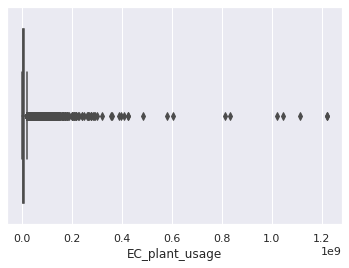

In [ ]:
sns.boxplot(x=data['EC_plant_usage'])                                 # Notice the outliers

In [ ]:
data['PLANT_AREA'].describe()                                     # Calculate Univariate statistics EC Plant Usage

count    1.530800e+04
mean     4.856624e+05
std      1.336025e+07
min      1.000000e+00
25%      6.000000e+04
50%      1.100000e+05
75%      2.030000e+05
max      1.450000e+09
Name: PLANT_AREA, dtype: float64

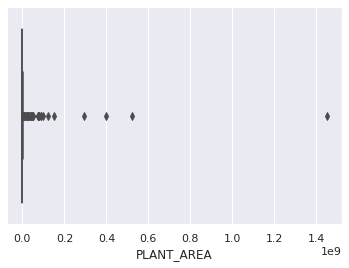

In [ ]:
sns.boxplot(x=data['PLANT_AREA'])                                 # Notice the outliers

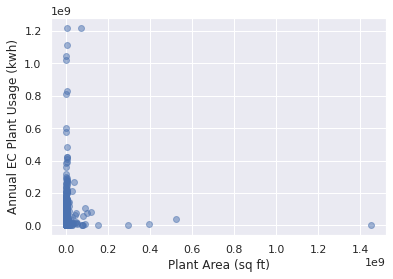

In [ ]:
import matplotlib.pyplot as plt                 # Import the matplotlib plotting package

plt.scatter(data['PLANT_AREA'], data['EC_plant_usage'], alpha=0.5)
plt.xlabel('Plant Area (sq ft)')
plt.ylabel('Annual EC Plant Usage (kwh)')
plt.show()

#### Data Modeling and Evaluation - Descriptive Analytics

*Now we need to make some statistical plots to help inspect the data*

*For benchmarking, we need to calculate the Energy Usage Index (EUI) which normalizes the annual energy consumed by the area of the building*

In [ ]:
data['EUI'] = data['EC_plant_usage']/data['PLANT_AREA']    # EUI (kwh/ft^2/yr)
data['EUI'].describe()                                     # Calculate Univariate statistics for EUI

count    1.526800e+04
mean     1.230390e+03
std      8.708216e+04
min      1.440000e-04
25%      1.623542e+01
50%      3.236591e+01
75%      6.527401e+01
max      8.545021e+06
Name: EUI, dtype: float64

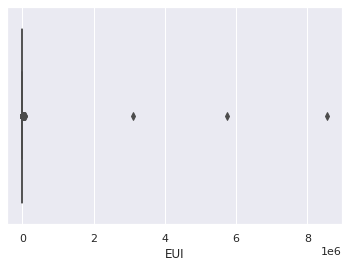

In [ ]:
sns.boxplot(x=data['EUI'])                                 # Notice the outliers

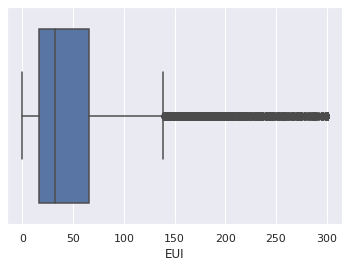

In [ ]:
sns.boxplot(x=data['EUI'].clip(lower=0, upper=3e2))       # Clip the range to see the bulk of the data

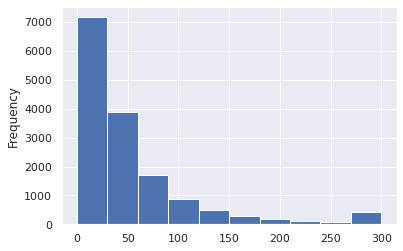

In [ ]:
data['EUI'].clip(lower=0, upper=3e2).plot(kind="hist")    # Create a histogram of the data

**This data has too many outliers and therefore is too contaminated to get reasonable inferences. Data cleansing is necessary.**

#### Data Cleansing

In [ ]:
missing = data['EUI'].isnull().sum()
print(missing)

4133


The EUI Column has 4133 missing values

In [ ]:
array = data['EUI'].to_numpy()
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
transformed_values = imp.fit_transform(array.reshape(-1,1))
transformed_values = pd.DataFrame(transformed_values)
transformed_values.isnull().sum()

0    0
dtype: int64

The Missing Values in EUI column have been imputed using SimpleImputer from sklearn and now have 0 missing values

## **SUPERVISED LEARNING**

## kNN
[Reference Link](https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn)

We will be classifying the data according to the 'State' in which the building is present

In [ ]:
data['STATE'].unique()    #All the unique states present in the dataset. Notice that some of them are in lower case and some in upper case.

array(['TX', 'UT', nan, 'Tx', 'LA', 'MS', 'AR', 'TN', 'AZ', 'NV', 'NM',
       'NC', 'VA', 'SC', 'IL', 'Il', 'MO', 'IN', 'Mo', 'IA', 'ID', 'WA',
       'AK', 'MT', 'OR', 'GA', 'CO', 'WY', 'NE', 'SD', 'ND', 'MI', 'OH',
       'DE', 'MD', 'PA', 'NJ', 'De', 'NY', 'MN', 'AL', 'FL', 'CT', 'KS',
       'WI', 'mn', 'Ne', 'In', 'CA', 'MA', 'VT', 'ME', 'RI', 'NH', 'ma',
       'Fl', 'PR', 'Al', 'KY', 'nc', 'OK', 'ok', 'Ok', 'Wa', 'ca', 'Ca',
       'HI', 'Hi', 'Oh', 'Ky', 'mi', 'Ut', 'WV'], dtype=object)

In [ ]:
data['STATE'] = data['STATE'].str.upper() #Converting all the states to UPPER case
data

,CENTER,FY,SIC,NAICS,STATE,SALES,EMPLOYEES,PLANT_AREA,PRODUCTS,PRODUNITS,PRODLEVEL,PRODHOURS,NUMARS,EC_plant_cost,EC_plant_usage,ED_plant_cost,ED_plant_usage,EF_plant_cost,E2_plant_cost,E2_plant_usage,E3_plant_cost,E3_plant_usage,E4_plant_cost,E4_plant_usage,E5_plant_cost,E5_plant_usage,E6_plant_cost,E6_plant_usage,E7_plant_cost,E7_plant_usage,E8_plant_cost,E8_plant_usage,E9_plant_cost,E9_plant_usage,E10_plant_cost,E10_plant_usage,E11_plant_cost,E11_plant_usage,E12_plant_cost,E12_plant_usage,W0_plant_cost,W0_plant_usage,W1_plant_cost,W1_plant_usage,W2_plant_cost,W2_plant_usage,W3_plant_cost,W3_plant_usage,W4_plant_cost,W4_plant_usage,W5_plant_cost,W5_plant_usage,W6_plant_cost,W6_plant_usage,EUI
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AM0001,AM,1987,3671,NaN,TX,33900000,206,NaN,MICRO & MINI COMPUTERS,1,310,2250,7,184985,2560082.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AM0002,AM,1987,2761,NaN,TX,25000000,156,NaN,BUSINESS FORMS,NaN,NaN,2250,9,267702,4867233.0,NaN,NaN,NaN,70657,19338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AM0003,AM,1987,3494,NaN,TX,15000000,200,NaN,SAFETY JOINTS & VALVES,NaN,NaN,2250,8,129334,1723036.0,NaN,NaN,NaN,10146,2074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AM0004,AM,1987,3713,NaN,TX,4200000,75,NaN,TRUCKS BEDS & TRAILERS,1,1000,2340,11,53511,483880.0,NaN,NaN,NaN,15475,3865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AM0005,AM,1987,2024,NaN,TX,12000000,39,NaN,ICE CREAM,5,2000,2080,7,174617,2868113.0,NaN,NaN,NaN,10448,2903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WV0599,WV,2020,2812,325180,WV,9.12e+07,232,865000.0,Chlorinated Dry Bleach,2,5.17e+07,8400,14,1.28201e+06,38688000.0,940893,62717,114518,611704,206312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.31439e+06,194544,181045,194544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.726012
WV0600,WV,2020,4581,488119,WV,2.9e+06,11,64121.0,Domestic Airport,NaN,5000,8760,6,34170,747835.0,30090,1788,1560,34489,4818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.662872
WV0601,WV,2020,2085,312140,WV,1e+07,28,6766.0,Distilled Spirits,5,159,8400,10,29162,746827.0,36410,2107,2014,71556,10194,1330,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91800,540000,NaN,NaN,24550,54000,NaN,NaN,15085,2.01135e+06,110.379397


In [ ]:
df = data[['PLANT_AREA','EC_plant_usage','EC_plant_cost','EUI','STATE']]  #For this example we will be using the selected columns
df

,PLANT_AREA,EC_plant_usage,EC_plant_cost,EUI,STATE
ID,,,,,
AM0001,NaN,2560082.0,184985,NaN,TX
AM0002,NaN,4867233.0,267702,NaN,TX
AM0003,NaN,1723036.0,129334,NaN,TX
AM0004,NaN,483880.0,53511,NaN,TX
AM0005,NaN,2868113.0,174617,NaN,TX
...,...,...,...,...,...
WV0599,865000.0,38688000.0,1.28201e+06,44.726012,WV
WV0600,64121.0,747835.0,34170,11.662872,WV
WV0601,6766.0,746827.0,29162,110.379397,WV


In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')           #Change the missing values to the mean value using SimpleImputer
imp = imp.fit(df[['EC_plant_cost','EC_plant_usage','EUI','PLANT_AREA']])
df[['EC_plant_cost','EC_plant_usage','EUI','PLANT_AREA']] = imp.transform(df[['EC_plant_cost','EC_plant_usage','EUI','PLANT_AREA']])
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,PLANT_AREA,EC_plant_usage,EC_plant_cost,EUI,STATE
ID,,,,,
AM0001,485662.367455,2560082.0,184985.0,1230.390300,TX
AM0002,485662.367455,4867233.0,267702.0,1230.390300,TX
AM0003,485662.367455,1723036.0,129334.0,1230.390300,TX
AM0004,485662.367455,483880.0,53511.0,1230.390300,TX
AM0005,485662.367455,2868113.0,174617.0,1230.390300,TX
...,...,...,...,...,...
WV0599,865000.000000,38688000.0,1282009.0,44.726012,WV
WV0600,64121.000000,747835.0,34170.0,11.662872,WV
WV0601,6766.000000,746827.0,29162.0,110.379397,WV


In [ ]:
#In order to simplify the example, we will be using just the buildings present in Texas, California, and Massachussetts

df1 = df[df['STATE']=='TX']       #Dataframe with rows specific to STATE = TX
df2 = df[df['STATE']=='CA']       #Dataframe with rows specific to STATE = CA
df3 = df[df['STATE']=='MA']       #Dataframe with rows specific to STATE = MA
df_states = pd.concat([df1,df2,df3])
df_states

,PLANT_AREA,EC_plant_usage,EC_plant_cost,EUI,STATE
ID,,,,,
AM0001,485662.367455,2560082.0,184985.0,1230.390300,TX
AM0002,485662.367455,4867233.0,267702.0,1230.390300,TX
AM0003,485662.367455,1723036.0,129334.0,1230.390300,TX
AM0004,485662.367455,483880.0,53511.0,1230.390300,TX
AM0005,485662.367455,2868113.0,174617.0,1230.390300,TX
...,...,...,...,...,...
MAS022,140000.000000,1200958.0,134082.0,8.578271,MA
MAS023,371000.000000,5252800.0,535921.0,14.158491,MA
MAS024,80000.000000,2196640.0,253720.0,27.458000,MA


In [ ]:
df_states['STATE'].unique()   #Confirming that only the desired states are selected

array(['TX', 'CA', 'MA'], dtype=object)

In [ ]:
#Splitting the data in predictors and response variables

X = df_states.iloc[:, :-1].values
y = df_states.iloc[:, 4].values

X represents the predictor variables - PLANT AREA, EC_plant_usage, EC_plant_cost, EUI

y represents the response variable - STATE

In [ ]:
#Splitting the data in Training and Testing Datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

We have split the data in training and testing set in the 80:20 ratio. The model will learn from the 80% of the entire data, i.e. training set. Then the model will be used to predict 20% of the entire data, i.e. test set. As we have 2905 total data points, 2324 data points form the training set and 581 data points form the test set.

In [ ]:
#Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Before using the A.I. model, we are scaling the features of the data. Scaling gives equal importance to all the features while evaluation.

In [ ]:
#Importing the kNN Method and training the data
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

As we know there are 3 different states in the selected dataset, we will select the n_neighbors = 3. Thus, we have selected our 'k' as 3 in this example.

In [ ]:
#Predicting on Test set
y_pred = classifier.predict(X_test)

In [ ]:
#Evaluation of the model using Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[185  21  54]
 [ 62  13  20]
 [ 79   8 139]]
              precision    recall  f1-score   support

          CA       0.57      0.71      0.63       260
          MA       0.31      0.14      0.19        95
          TX       0.65      0.62      0.63       226

    accuracy                           0.58       581
   macro avg       0.51      0.49      0.48       581
weighted avg       0.56      0.58      0.56       581



Understanding the Classification Report:
[Reference Link](https://medium.com/@kohlishivam5522/understanding-a-classification-report-for-your-machine-learning-model-88815e2ce397)

There are four ways to check if the predictions are right or wrong:

TN / True Negative: the case was negative and predicted negative

TP / True Positive: the case was positive and predicted positive

FN / False Negative: the case was positive but predicted negative

FP / False Positive: the case was negative but predicted positive

**Precision — What percent of your predictions were correct?**

Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class, it is defined as the ratio of true positives to the sum of a true positive and false positive.

Precision:- Accuracy of positive predictions.

Precision = TP/(TP + FP)

**Recall — What percent of the positive cases did you catch?**

Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

Recall:- Fraction of positives that were correctly identified.

Recall = TP/(TP+FN)

**F1 score — What percent of positive predictions were correct?**

The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

**Support**

Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

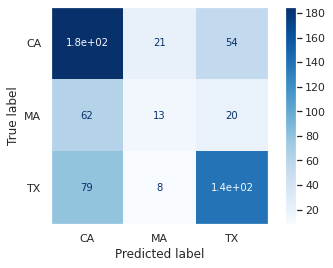

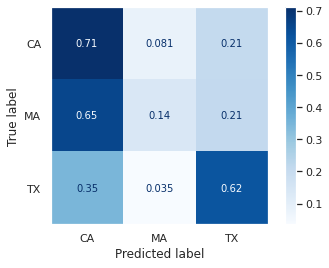

In [ ]:
#Plotting the Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
# Plot non-normalized confusion matrix
plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues)
plt.grid(None)
# Plot normalized confusion matrix
plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
plt.grid(None)
plt.show()

Please refer to the lecture material in order to interpret the Confusion Matrix

## Decision Trees for Classification
[Reference Link](https://stackabuse.com/decision-trees-in-python-with-scikit-learn)

We will be using the same dataset and approach as kNN, for the Decision Trees Classification.

In [ ]:
df_states

,PLANT_AREA,EC_plant_usage,EC_plant_cost,EUI,STATE
ID,,,,,
AM0001,485662.367455,2560082.0,184985.0,1230.390300,TX
AM0002,485662.367455,4867233.0,267702.0,1230.390300,TX
AM0003,485662.367455,1723036.0,129334.0,1230.390300,TX
AM0004,485662.367455,483880.0,53511.0,1230.390300,TX
AM0005,485662.367455,2868113.0,174617.0,1230.390300,TX
...,...,...,...,...,...
MAS022,140000.000000,1200958.0,134082.0,8.578271,MA
MAS023,371000.000000,5252800.0,535921.0,14.158491,MA
MAS024,80000.000000,2196640.0,253720.0,27.458000,MA


In [ ]:
#Splitting the data in predictors and response variables
X = df_states.iloc[:, :-1].values
y = df_states.iloc[:, 4].values
#Splitting the data in Training and Testing Datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
#Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#Importing the Decision Trees Method and training the data
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
#Predicting on Test set
y_pred = classifier.predict(X_test)
#Evaluation of the model using Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[160  39  68]
 [ 49  23  16]
 [ 63  32 131]]
              precision    recall  f1-score   support

          CA       0.59      0.60      0.59       267
          MA       0.24      0.26      0.25        88
          TX       0.61      0.58      0.59       226

    accuracy                           0.54       581
   macro avg       0.48      0.48      0.48       581
weighted avg       0.54      0.54      0.54       581



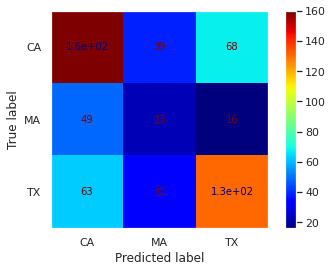

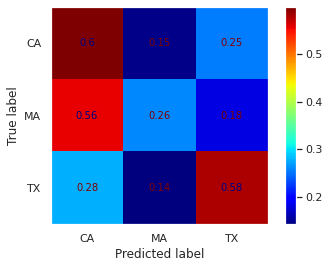

In [ ]:
#Plotting the Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
# Plot non-normalized confusion matrix
plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.jet)
plt.grid(None)
# Plot normalized confusion matrix
plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.jet,normalize='true')
plt.grid(None)
plt.show()

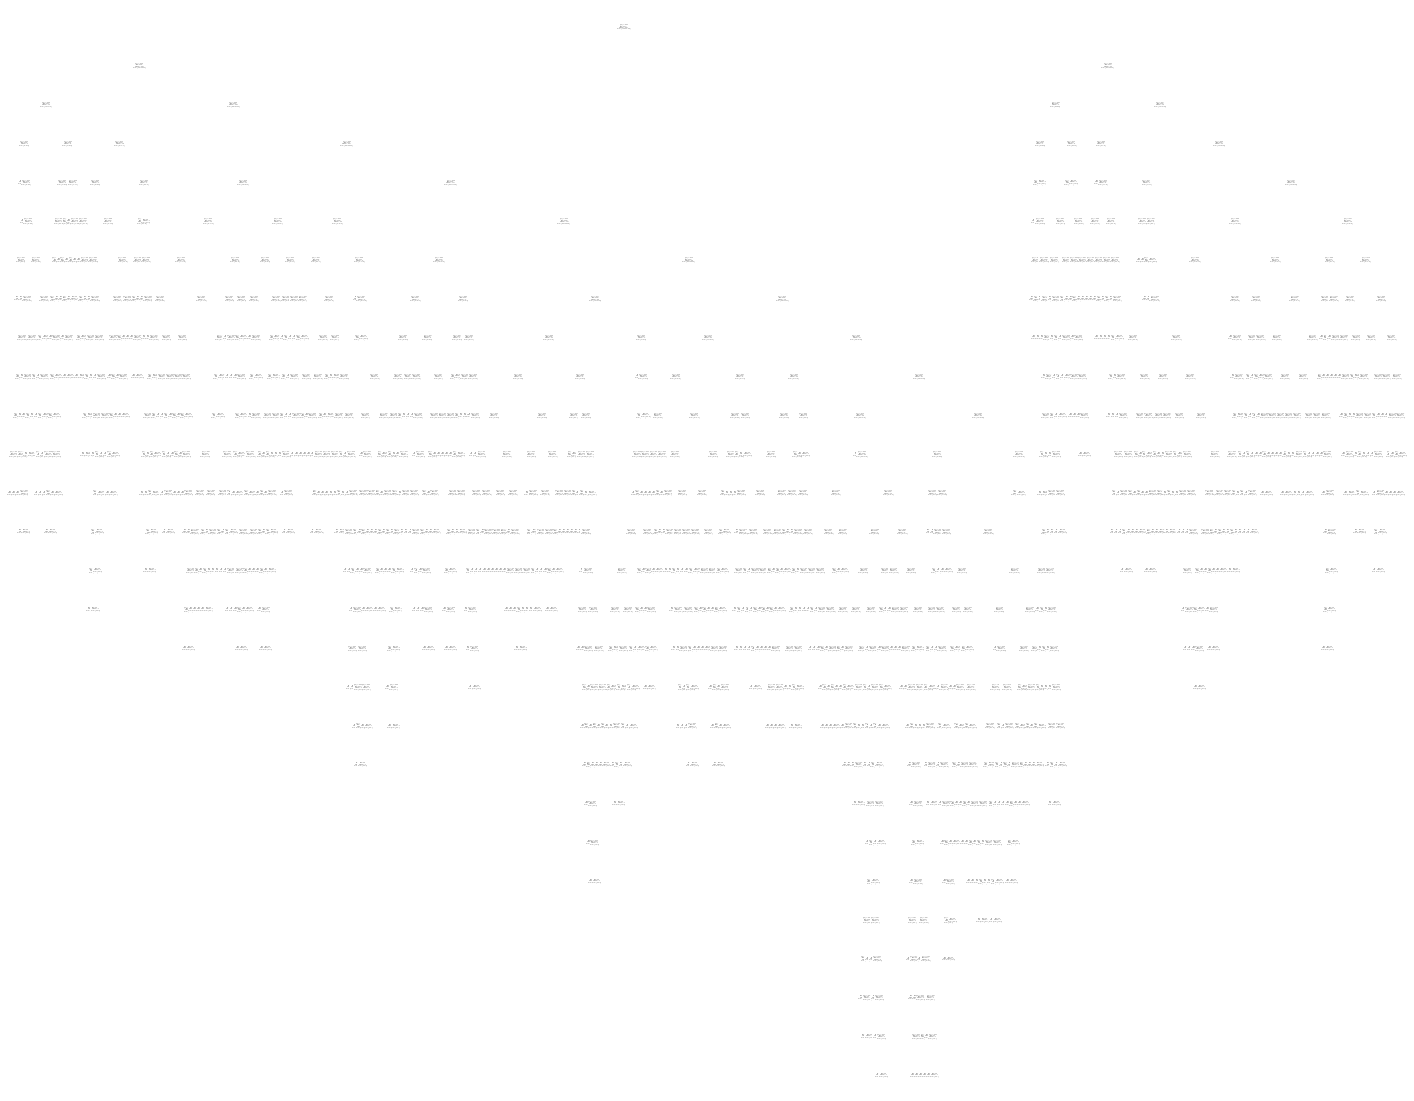

In [ ]:
from sklearn import tree
plt.figure(figsize=(25,20))
tree.plot_tree(classifier)
plt.show()

## Naive Bayes
[Reference Link](https://stackabuse.com/the-naive-bayes-algorithm-in-python-with-scikit-learn)

In [ ]:
df_states

,PLANT_AREA,EC_plant_usage,EC_plant_cost,EUI,STATE
ID,,,,,
AM0001,485662.367455,2560082.0,184985.0,1230.390300,TX
AM0002,485662.367455,4867233.0,267702.0,1230.390300,TX
AM0003,485662.367455,1723036.0,129334.0,1230.390300,TX
AM0004,485662.367455,483880.0,53511.0,1230.390300,TX
AM0005,485662.367455,2868113.0,174617.0,1230.390300,TX
...,...,...,...,...,...
MAS022,140000.000000,1200958.0,134082.0,8.578271,MA
MAS023,371000.000000,5252800.0,535921.0,14.158491,MA
MAS024,80000.000000,2196640.0,253720.0,27.458000,MA


In [ ]:
#Splitting the data in predictors and response variables
X = df_states.iloc[:, :-1].values
y = df_states.iloc[:, 4].values
#Splitting the data in Training and Testing Datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
#Scaling the features is not done as Naive Bayes does not take negative value inputs
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)
#Importing the Decision Trees Method and training the data
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
#Predicting on Test set
y_pred = classifier.predict(X_test)
#Evaluation of the model using Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 92 122  53]
 [ 39  38   9]
 [ 83  24 121]]
              precision    recall  f1-score   support

          CA       0.43      0.34      0.38       267
          MA       0.21      0.44      0.28        86
          TX       0.66      0.53      0.59       228

    accuracy                           0.43       581
   macro avg       0.43      0.44      0.42       581
weighted avg       0.49      0.43      0.45       581



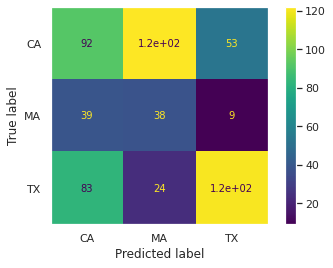

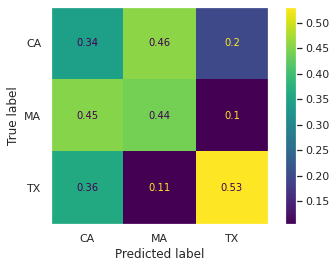

In [ ]:
#Plotting the Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
# Plot non-normalized confusion matrix
plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.viridis)
plt.grid(None)
# Plot normalized confusion matrix
plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.viridis,normalize='true')
plt.grid(None)
plt.show()

Thus by comparing the 3 techniques, we have got the following result:

kNN - 0.59

Decision Trees - 0.55

Naive Bayes - 0.48

Thus, of the 3 techniques, for the selected dataset, kNN has the highest accuracy in classification

# **ANN - Classification**

**MLP Classification**

In [ ]:
df_states

,PLANT_AREA,EC_plant_usage,EC_plant_cost,EUI,STATE
ID,,,,,
AM0001,485662.367455,2560082.0,184985.0,1230.390300,TX
AM0002,485662.367455,4867233.0,267702.0,1230.390300,TX
AM0003,485662.367455,1723036.0,129334.0,1230.390300,TX
AM0004,485662.367455,483880.0,53511.0,1230.390300,TX
AM0005,485662.367455,2868113.0,174617.0,1230.390300,TX
...,...,...,...,...,...
MAS022,140000.000000,1200958.0,134082.0,8.578271,MA
MAS023,371000.000000,5252800.0,535921.0,14.158491,MA
MAS024,80000.000000,2196640.0,253720.0,27.458000,MA


In [ ]:
#Splitting the data in predictors and response variables
X = df_states.iloc[:, :-1].values
y = df_states.iloc[:, 4].values
#Splitting the data in Training and Testing Datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
#Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#Importing the MLP Classifier and training the data
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(20, 50, 100), max_iter=1000)
mlp.fit(X_train, y_train)
#Predicting on Test set
y_pred = mlp.predict(X_test)
#Evaluation of the model using Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[239   6  35]
 [ 70  10  20]
 [ 70   3 128]]
              precision    recall  f1-score   support

          CA       0.63      0.85      0.73       280
          MA       0.53      0.10      0.17       100
          TX       0.70      0.64      0.67       201

    accuracy                           0.65       581
   macro avg       0.62      0.53      0.52       581
weighted avg       0.64      0.65      0.61       581



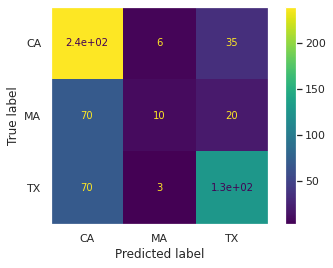

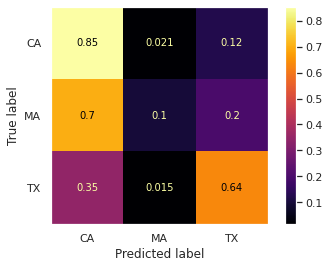

In [ ]:
#Plotting the Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
# Plot non-normalized confusion matrix
plot_confusion_matrix(mlp, X_test, y_test, cmap=plt.cm.viridis)
plt.grid(None)
# Plot normalized confusion matrix
plot_confusion_matrix(mlp, X_test, y_test, cmap=plt.cm.inferno,normalize='true')
plt.grid(None)
plt.show()